In [1]:
from jax_circuits import *
# from exact_decompositions import *
from qiskit import transpile
from qiskit.circuit.library import *
from qiskit.quantum_info import OneQubitEulerDecomposer, random_clifford
from cp_utils import *
from scipy.stats import unitary_group

To do

1. Local minima plots in an accurate way:
    1. For each ansatz several random unitaries and several self-unitaries. 
    1. Separately stats for different realizations of Toffoli 3 and Toffoli 4 gates.

# Local minimums

In [22]:
with open('scripts/results/local_minimums/2q_random_self_rs0', 'rb')  as f:
    res = pickle.load(f)

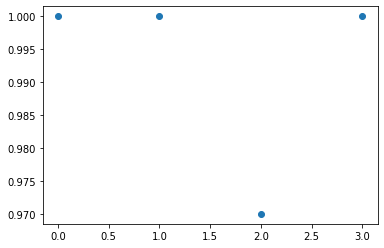

In [26]:
plt.scatter([r['num_cz_gates'] for r in res], [r['success_ratio'] for r in res])

In [21]:
success_ratio(3, 9, 'random_self', 200, 0)

{'u_target': DeviceArray([[-0.29470095-0.3773886j ,  0.09311418-0.11133659j,
               -0.16810302-0.14672203j, -0.1675328 -0.02094156j,
                0.15326998-0.34222052j, -0.02802873+0.3675722j ,
                0.22311774-0.03526231j, -0.5658742 -0.15372416j],
              [-0.3978111 +0.10287364j,  0.12912118+0.02298552j,
                0.09051987+0.20737302j, -0.12876141-0.31858003j,
                0.1700865 +0.41565853j, -0.39094236+0.31858456j,
               -0.03410435-0.40213662j,  0.13252823+0.09065402j],
              [ 0.23804863+0.13589711j,  0.09693439-0.01718009j,
               -0.41857076-0.10477793j,  0.23243289+0.07471322j,
                0.1507368 +0.37571365j, -0.12564859+0.35343397j,
               -0.04100351+0.42075515j, -0.21059002+0.37647906j],
              [-0.24585983+0.12495063j, -0.2813289 +0.32843125j,
               -0.47191128+0.01505139j,  0.26633343-0.3221225j ,
                0.18229663-0.35248j   , -0.09693578-0.07920533j,
          

In [19]:
%%time
success_chart(2, [2], 'random_unitary', 1000, 2, 'results/2q_random_self_0')

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 4min 44s, sys: 14.5 s, total: 4min 58s
Wall time: 4min 26s


[DeviceArray(1., dtype=float32)]

In [ ]:
0.005

In [35]:
success_ratio(3, 6, 'self')

DeviceArray(0.1, dtype=float32)

In [20]:
success_chart(3, range(15)[::3], 'self', 'results/s_chart_3_self')

  0%|          | 0/5 [00:00<?, ?it/s]

[DeviceArray(1., dtype=float32),
 DeviceArray(0.78, dtype=float32),
 DeviceArray(0.1, dtype=float32),
 DeviceArray(0., dtype=float32),
 DeviceArray(0., dtype=float32)]

In [22]:
list(range(15)[::3])
                                                       
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    l''    
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

[0, 3, 6, 9, 12]

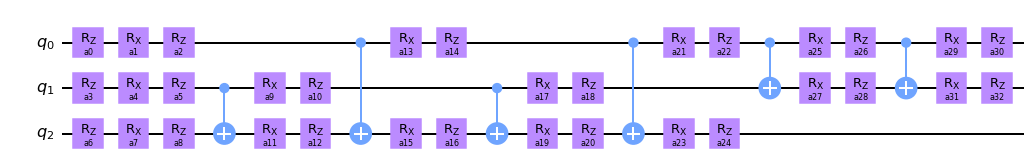

In [2]:
placements_toff3 = [[1, 2], [0, 2], [1, 2], [0, 2], [0, 1], [0, 1]]
anz = Ansatz(3, 'cx', placements={'free': placements_toff3})

anz.circuit().draw(output='mpl')

In [3]:
res = anz.learn(u_toff3, num_repeats=200)

In [4]:
s = [min(r['loss'])<1e-4 for r in res]
sum(s)/len(s)

0.535

In [5]:
results = Results.load('results/toff3_conn_test')
results.decompositions

[< toff3_conn_test| Approximate | cz count: 6 | cz depth: 6 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 6 | cz depth: 6 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 6 | cz depth: 6 | loss: 1.1920928955078125e-07 >,
 < toff3_conn_test| Approximate | cz count: 7 | cz depth: 7 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 7 | cz depth: 7 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 6 | cz depth: 6 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 8 | cz depth: 8 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 8 | cz depth: 8 | loss: 0.0 >,
 < toff3_conn_test| Approximate | cz count: 9 | cz depth: 9 | loss: 0.0 >]

In [6]:
n = 0

d = results.decompositions[n]
qc = d.circuit
u, angles, wires = qiskit_circ_to_jax_unitary(qc)

loss_f = lambda angs: disc2(u(angs), u_toff3)
res = mynimize_repeated(loss_f, len(angles), num_repeats=100)

s = [min(r['loss'])<1e-4 for r in res]
sum(s)/len(s)

0.36

In [7]:
n = 1

d = results.decompositions[n]
qc = d.circuit
u, angles, wires = qiskit_circ_to_jax_unitary(qc)

loss_f = lambda angs: disc2(u(angs), u_toff3)
res = mynimize_repeated(loss_f, len(angles), num_repeats=100)

s = [min(r['loss'])<1e-4 for r in res]
sum(s)/len(s)

0.68

In [9]:
n = 2

d = results.decompositions[n]
qc = d.circuit
u, angles, wires = qiskit_circ_to_jax_unitary(qc)

loss_f = lambda angs: disc2(u(angs), u_toff3)
res = mynimize_repeated(loss_f, len(angles), num_repeats=100)

s = [min(r['loss'])<1e-4 for r in res]
sum(s)/len(s)

0.52